![A soccer pitch for an international match.](assets/soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

Perform an appropriate hypothesis test to determine the p-value, and hence result, of whether to reject or fail to reject the null hypothesis that the mean number of goals scored in women's international soccer matches is the same as men's. Use a **10% significance level**.

For this analysis, you'll use Official `FIFA World Cup` matches since `2002-01-01`, and you'll also assume that each match is fully independent, i.e., team form is ignored.

The p-value and the result of the test must be stored in a dictionary called `result_dict` in the form:

`result_dict = {"p_val": p_val, "result": result}`

where `p_val` is the p-value and `result` is either the string `"fail to reject"` or `"reject"`, depending on the result of the test.

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin # Python package for statistical analysis

# Load men's and women's datasets
men = pd.read_csv("data/men_results.csv")
women = pd.read_csv("data/women_results.csv")

# Check women's data
women.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB


In [2]:
# Check men's data
men

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly
...,...,...,...,...,...,...,...
44348,44348,2022-12-14,Thailand,Taiwan,0,1,Friendly
44349,44349,2022-12-14,Vietnam,Philippines,1,0,Friendly
44350,44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup
44351,44351,2022-12-17,Singapore,Maldives,3,1,Friendly


First, we need to convert "date" column to datetime in order to filter the timeline indicated. 
We also need to filter the tournaments that are only linked to the FIFA World Cup.

In [3]:
# Filter men's data
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"]=="FIFA World Cup")]

# Filter women's data
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

women_subset.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


Now, we prepare both datasets in order to know the total number of goals

In [4]:
# Create group and goals_scored columns
men_subset["group"] = "men"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]

women_subset["group"] = "women"
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

women_subset.head()

/var/folders/q5/n9nsskgd1y7d9jkzzzmv_f780000gn/T/ipykernel_3702/1160383686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
/var/folders/q5/n9nsskgd1y7d9jkzzzmv_f780000gn/T/ipykernel_3702/1160383686.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
/var/folders/q5/n9nsskgd1y7d9jkzzzmv_f780000gn/T/ipykernel_3702/1160383686.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


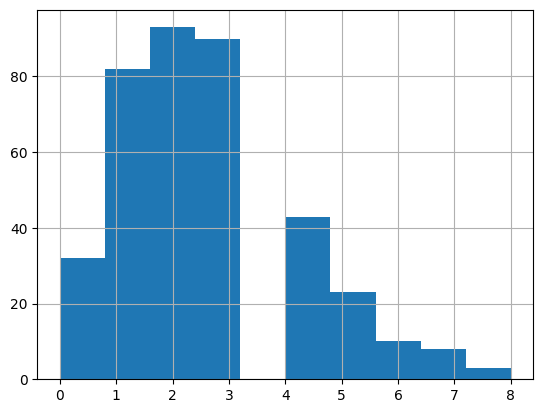

<Figure size 640x480 with 0 Axes>

In [5]:
# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

As we can see in the histogram, the goals scored are not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups. Before performing the calculation for p-value, we concatenate both datasets in a single dataframe.

**Recall**: The Wilcoxon-Mann-Whitney test, also known as the Mann-Whitney U test, is a non-parametric statistical test used to determine whether two independent samples come from the same distribution or not. It's particularly useful when the assumptions of parametric tests like the t-test are not met, such as when the data is not normally distributed or when the variances are unequal.

In [6]:
# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

both.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,group,goals_scored
0,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,women,3
1,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,women,2
2,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,women,5
3,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,women,6
4,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,women,4


In order to perform the Wilcoxon-Mann-Whitney test (using pingouin), we need to prepare the data. The `pingouin.mwu()` function expects two arrays or Series objects as inputs: one for each group being compared. Pivoting the DataFrame allows separating the data into separate arrays for men and women, making it easier to pass them as arguments to the function.

In [7]:
# Pivot the dataframe to a wide format where the columns represent groups (men and women) and the values are goals scored
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

both_subset_wide

group,men,women
0,NaN,3.0
1,NaN,2.0
2,NaN,5.0
3,NaN,6.0
4,NaN,4.0
...,...,...
579,3.0,NaN
580,3.0,NaN
581,2.0,NaN
582,3.0,NaN


In [8]:
# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

results_pg

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [9]:
# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

In [10]:
# Determine hypothesis test result using sig. level (10%)
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
print(f"The p-value is {p_val}, so we {result} the null hypothesis")

The p-value is 0.0051066098254436395, so we reject the null hypothesis
